 <h1>Telco Customer Churn Prediction</h1>

**Context:** </br>
"Predict behavior to retain customers. Analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content:** </br>
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month - the column is called Churn
- Services that each customer has signed up for - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information - how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers - gender, age range, and if they have partners and dependents

<h3> - Get data</h3>

In [46]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [47]:
import numpy as np
import pandas as pd

In [48]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [49]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<h2>Quick Overview</h2>

In [50]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
df.shape

(7043, 21)

In [52]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [53]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- TotalCharges is in **Object** datatype, but it should be float

In [55]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [56]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


- Due to **errors='coerce'**, value that cannot be changed to float becomes np.nan

In [57]:
df[np.isnan(df['TotalCharges'])].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [58]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

**It's clear that df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)'TotalCharges' is nan whan 'tenure' is 0**

dropping null records :-

In [59]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

In [60]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


<h2>Class Distribution</h2>

<Axes: title={'center': 'Target Distribution'}, xlabel='Churn'>

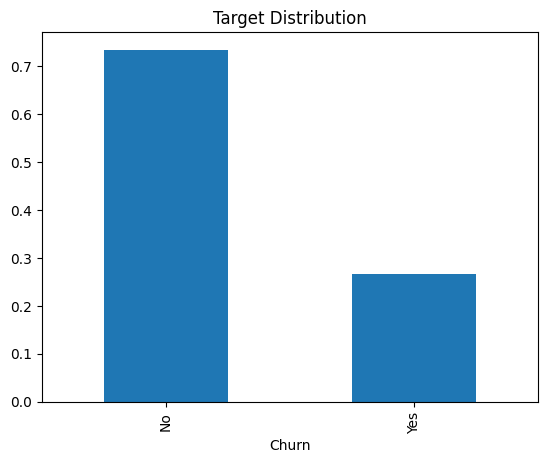

In [61]:
df['Churn'].value_counts(normalize=True).plot.bar(title = 'Target Distribution')

- from the graph we can say that the data is **imbalance**

- here 'customerID' is unique so it can not be used to predict

In [62]:
df = df.drop(['customerID'], axis = 1)

<h3>Column Types: Categorical vs Numerical</h3>

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [64]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

In [65]:
print('\nCategorical columns: ', cat_cols)
print('\nNumerical columns: ', num_cols)


Categorical columns:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Numerical columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [66]:
cat_cols.remove('Churn')

<h2>Univariate Analysis</h2>

- for categorical

In [67]:
for col in cat_cols:
    print(f'{col} number of unique values: {df[col].nunique()} | unique values: {df[col].unique()}')

gender number of unique values: 2 | unique values: ['Female' 'Male']
Partner number of unique values: 2 | unique values: ['Yes' 'No']
Dependents number of unique values: 2 | unique values: ['No' 'Yes']
PhoneService number of unique values: 2 | unique values: ['No' 'Yes']
MultipleLines number of unique values: 3 | unique values: ['No phone service' 'No' 'Yes']
InternetService number of unique values: 3 | unique values: ['DSL' 'Fiber optic' 'No']
OnlineSecurity number of unique values: 3 | unique values: ['No' 'Yes' 'No internet service']
OnlineBackup number of unique values: 3 | unique values: ['Yes' 'No' 'No internet service']
DeviceProtection number of unique values: 3 | unique values: ['No' 'Yes' 'No internet service']
TechSupport number of unique values: 3 | unique values: ['No' 'Yes' 'No internet service']
StreamingTV number of unique values: 3 | unique values: ['No' 'Yes' 'No internet service']
StreamingMovies number of unique values: 3 | unique values: ['No' 'Yes' 'No internet se

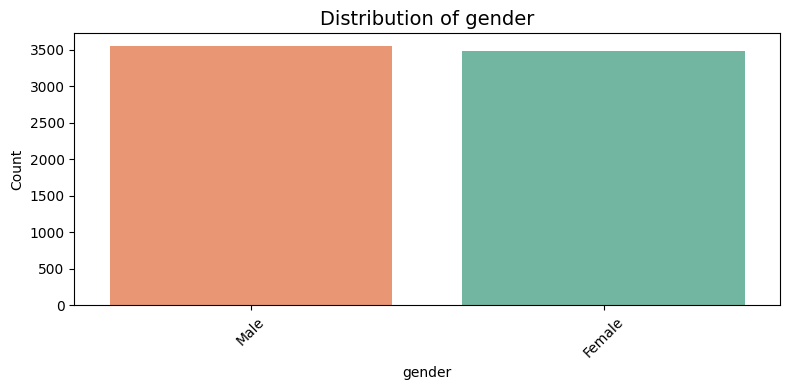

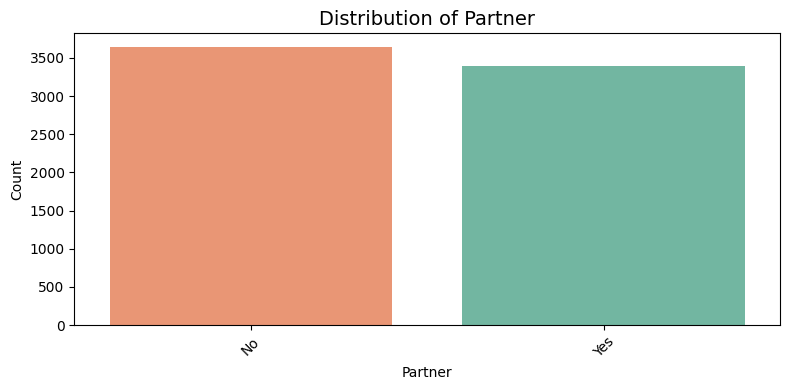

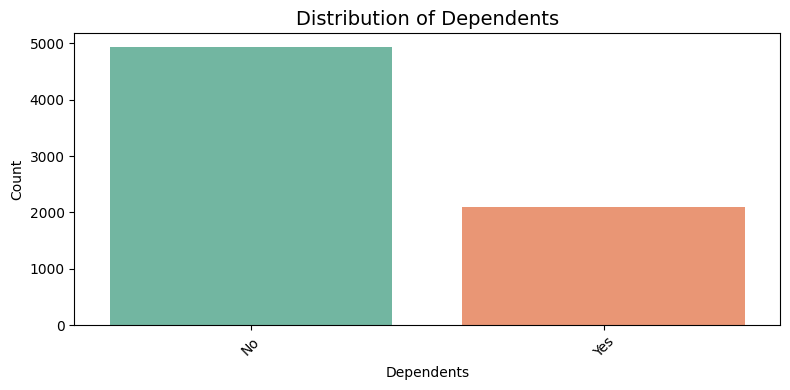

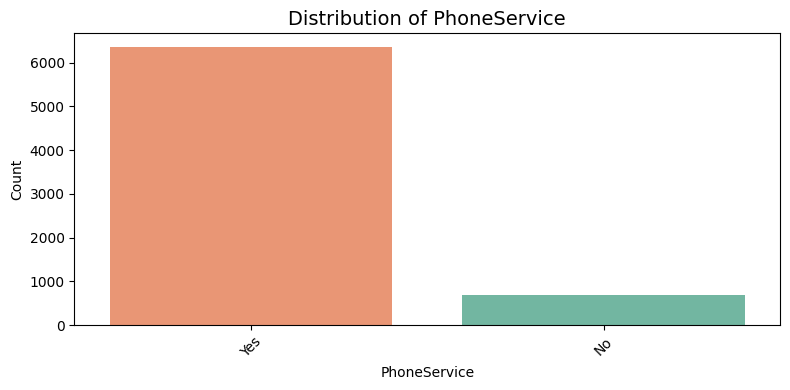

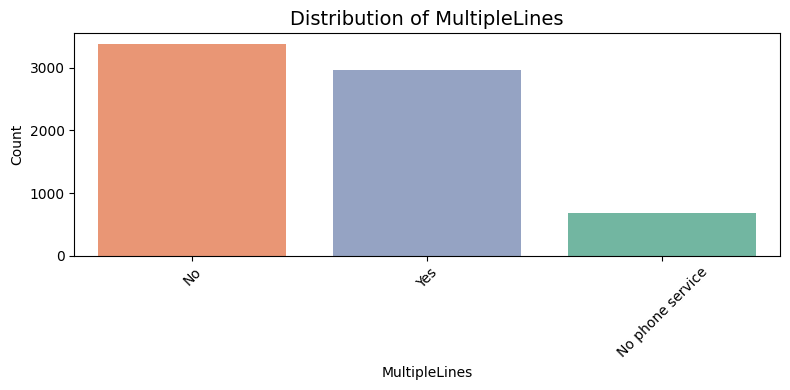

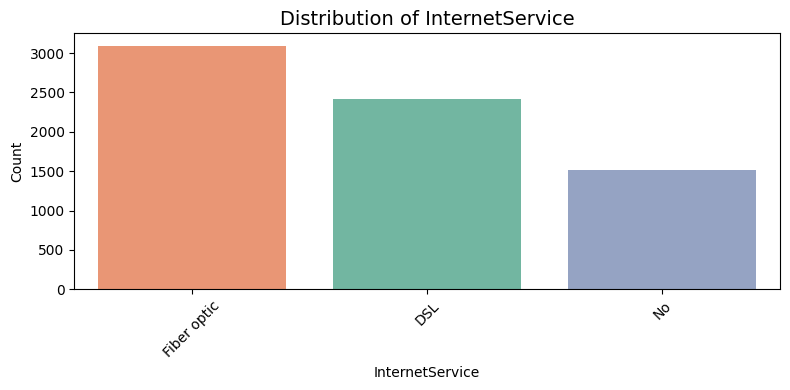

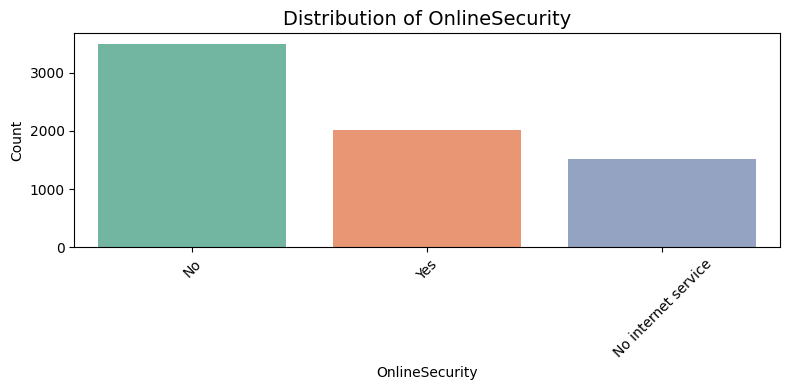

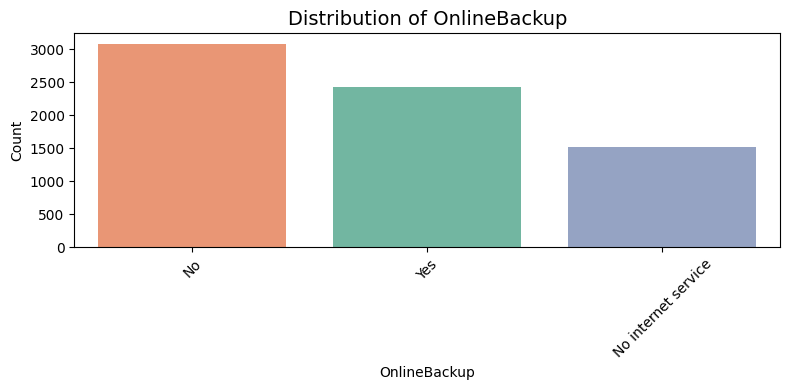

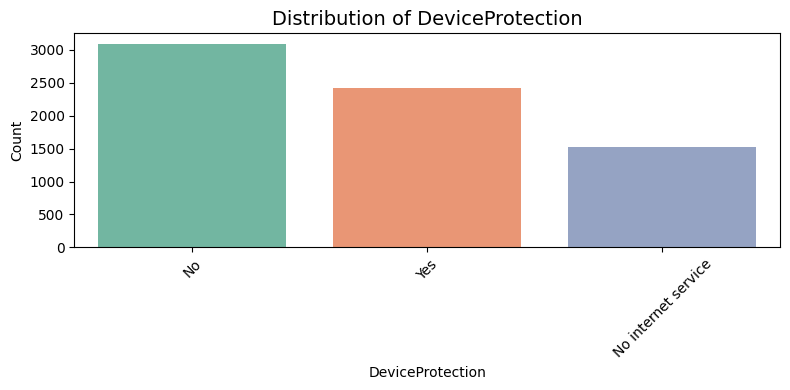

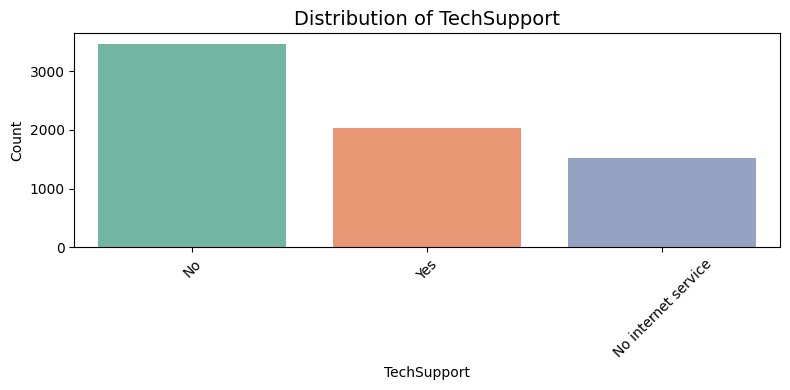

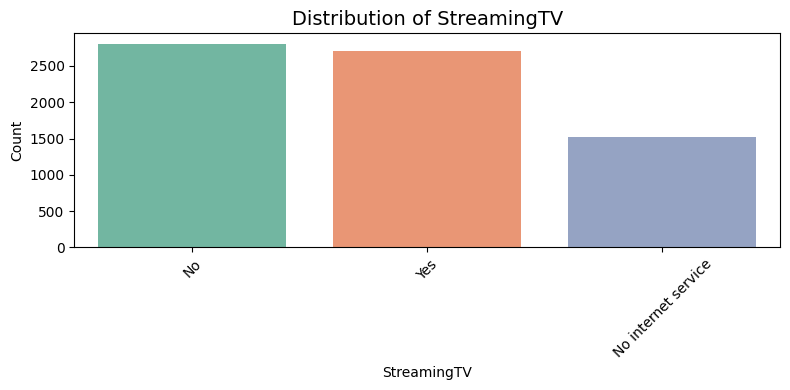

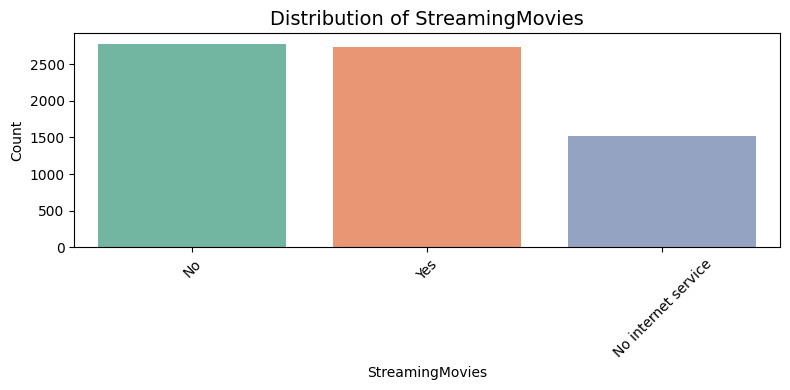

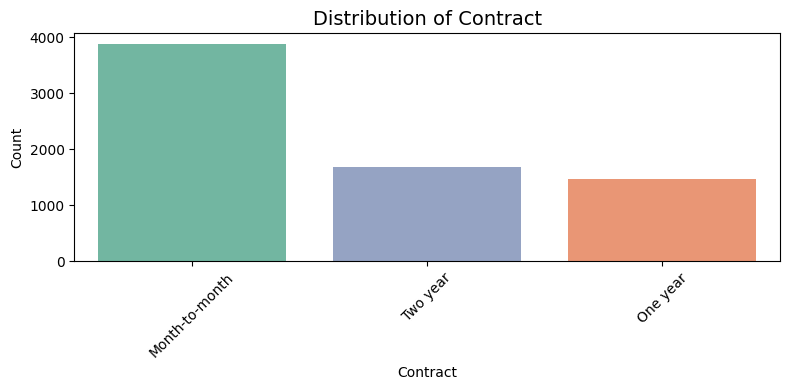

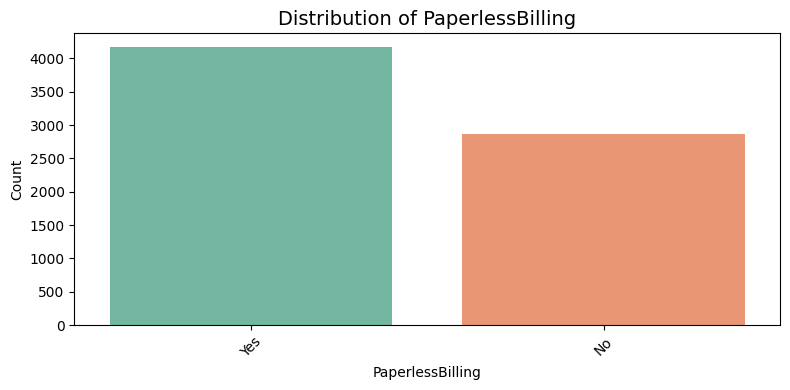

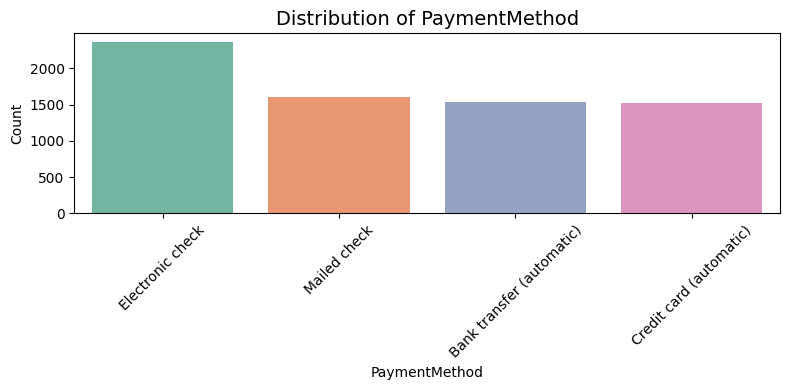

In [68]:
for col in cat_cols:
    if df[col].nunique() <= 20:
        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue= col, palette='Set2')
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

- for **Numerical**

In [69]:
for col in num_cols:
    fig = px.histogram(df, x=col, nbins=30, marginal="box", title=f'Distribution of {col}')
    fig.show()

<h2>Bivariate Analysis </h2>

- for **Categorical**

In [70]:
for col in cat_cols:
    if df[col].nunique() <= 10:
        fig = px.histogram(df, x=col, color='Churn', barmode='group', title=f'{col} vs Churn')
        fig.show()

- for **Numerical**

In [71]:
for col in num_cols:
    fig = px.box(df, x='Churn', y=col, color='Churn', title=f'{col} vs Churn')
    fig.show()

<h2>Correlation</h2>

<Axes: >

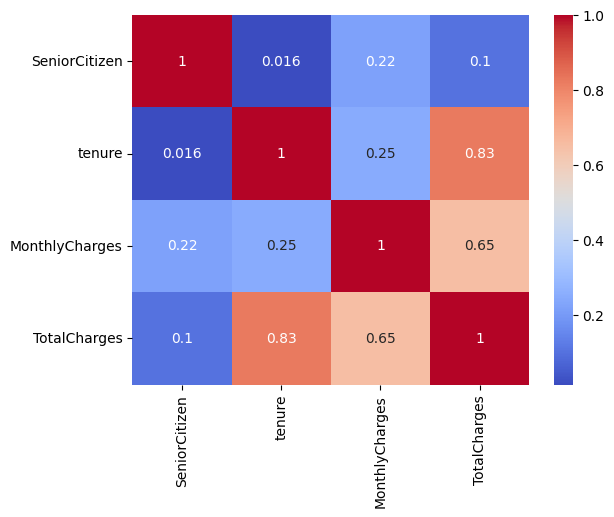

In [72]:
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')

<h2>Data Preprocessing</h2>

In [73]:
df_clean = df.copy()

- features classification

In [74]:
binary_cols = [col for col in df_clean.columns if df_clean[col].nunique() == 2 and df_clean[col].dtype == 'object']
multi_cat_cols = [col for col in df_clean.select_dtypes(include='object').columns if df_clean[col].nunique() > 2]
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

- label encodding for binary features

In [75]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in binary_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

- pd.get_dummies for multi categorical featues

In [76]:
df_clean = pd.get_dummies(df_clean, columns=multi_cat_cols, drop_first=True)

In [77]:
#feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])


<h2>Basic Models</h2>

- modeling for the predictions

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [79]:
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

- splittin the data

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

- models for the predictions

In [81]:
models = {
    "Logistic Regression": LogisticRegression(max_iter = 1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}


### 📊 Model Evaluation Function with Cross-Validation and Test Set

In [82]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    precision_recall_curve, roc_curve, auc
)

def evaluate_models_with_cv(X_train, y_train, X_test, y_test, models, cv_splits=5):
    results = []
    roc_curves = {}
    pr_curves = {}

    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    for name, model in models.items():
        print(f"Training: {name}")

        # Cross-val predictions (on training set for metrics estimation)
        y_proba_train = cross_val_predict(model, X_train, y_train, cv=skf, method='predict_proba')[:, 1]
        y_pred_train = (y_proba_train >= 0.5).astype(int)

        # Fit on full training set and evaluate on test set
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_proba_test = model.predict_proba(X_test)[:, 1]

        # Metrics on test set
        acc = accuracy_score(y_test, y_pred_test)
        prec = precision_score(y_test, y_pred_test)
        rec = recall_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)
        roc_auc = roc_auc_score(y_test, y_proba_test)

        # Precision-Recall AUC
        precision, recall, _ = precision_recall_curve(y_test, y_proba_test)
        pr_auc = auc(recall, precision)

        # ROC & PR curves for plotting
        fpr, tpr, _ = roc_curve(y_test, y_proba_test)
        roc_curves[name] = (fpr, tpr)
        pr_curves[name] = (recall, precision)

        # Store results
        results.append({
            'Model': name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'PR-AUC': pr_auc
        })

    return pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False), roc_curves, pr_curves

This function `evaluate_models_with_cv()` performs the following steps for each model:
- Uses `StratifiedKFold` to generate cross-validated predictions on the training set.
- Trains each model on the full training set and evaluates it on the separate test set.
- Calculates key metrics: Accuracy, Precision, Recall, F1-score, ROC-AUC, and PR-AUC.
- Stores and returns metrics along with data for ROC and Precision-Recall curves.

The function returns:
1. A sorted `DataFrame` with evaluation metrics
2. A dictionary of ROC curves
3. A dictionary of Precision-Recall curves

In [83]:
def plot_roc_curves(roc_curves):
    plt.figure(figsize=(8, 6))
    for name, (fpr, tpr) in roc_curves.items():
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC={auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

def plot_pr_curves(pr_curves):
    plt.figure(figsize=(8, 6))
    for name, (recall, precision) in pr_curves.items():
        auc_score = auc(recall, precision)
        plt.plot(recall, precision, label=f'{name} (AUC={auc_score:.2f})')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curves")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

<h2>Model Evulation</h2>

Training: Logistic Regression
Training: Random Forest
Training: XGBoost
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC  \
0  Logistic Regression  0.803838   0.649390  0.569519  0.606838  0.836040   
2              XGBoost  0.766880   0.567647  0.516043  0.540616  0.814188   
1        Random Forest  0.783227   0.616949  0.486631  0.544096  0.812799   

     PR-AUC  
0  0.621422  
2  0.609274  
1  0.598873  


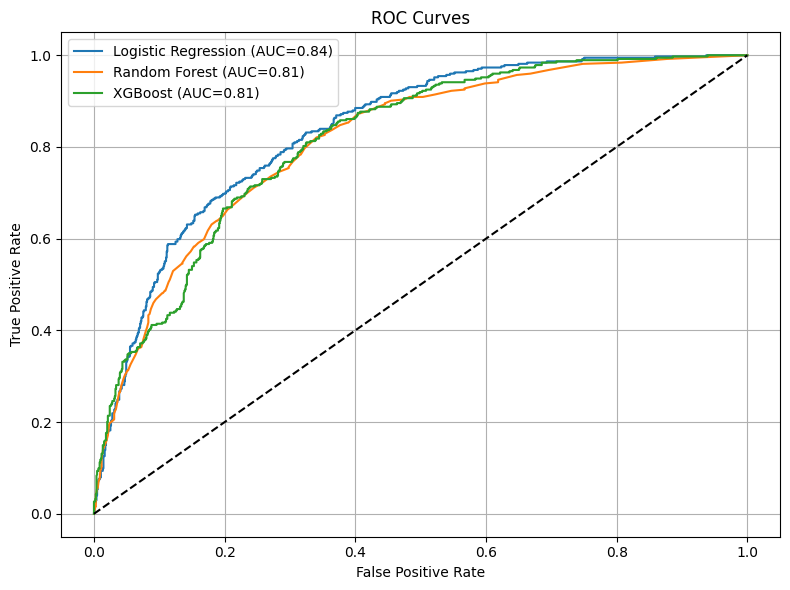

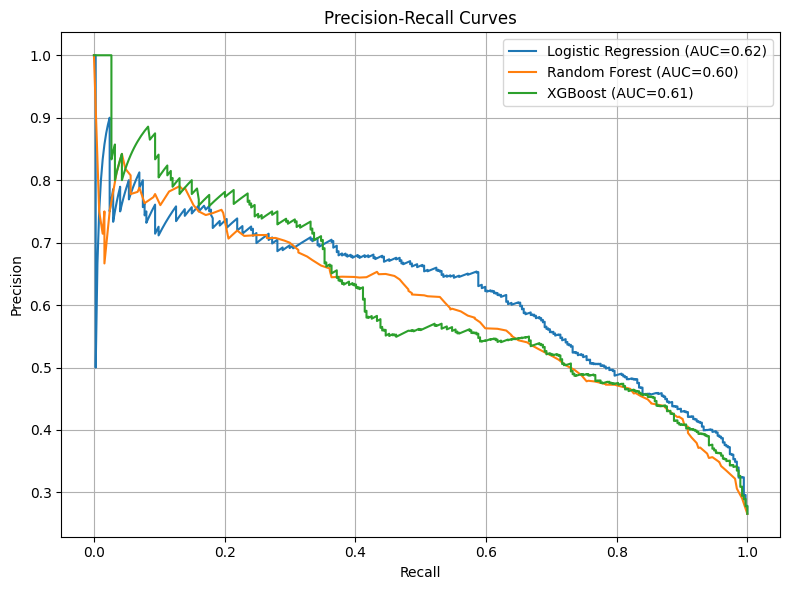

In [84]:
# Run evaluation
results_df, roc_curves, pr_curves = evaluate_models_with_cv(X_train, y_train,X_test, y_test, models)

# View results
print(results_df)

# Plot ROC and PR curves
plot_roc_curves(roc_curves)
plot_pr_curves(pr_curves)

- **Logistic regression** is better in every aspect among other base models

<h2>Hyperparameter Tuning</h2>

- some fine tuning

In [85]:
best_models = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000, solver='liblinear'),  # solver needed for 'l1'
        {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2']
        }
    ),
    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    ),
    "XGBoost": (
        XGBClassifier(eval_metric='logloss', random_state=42),
        {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.3],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    )
}

In [86]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    precision_recall_curve, roc_curve, auc
)
import pandas as pd

def evaluate_models_with_gridcv(X_train, y_train, X_test, y_test, models_with_params, cv_splits=5):
    results = []
    roc_curves = {}
    pr_curves = {}
    best_models = {}

    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    for name, (model, params) in models_with_params.items():
        print(f"Tuning: {name}")

        # Hyperparameter tuning
        grid = GridSearchCV(model, param_grid=params, scoring='f1', cv=skf)
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        best_models[name] = best_model

        # Evaluate on test set
        y_pred = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1]

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba)

        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        pr_auc = auc(recall, precision)

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves[name] = (fpr, tpr)
        pr_curves[name] = (recall, precision)

        results.append({
            'Model': name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'PR-AUC': pr_auc
        })

    results_df = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False)
    return results_df, roc_curves, pr_curves, best_models


In [87]:
results_df, roc_curves, pr_curves, best_models = evaluate_models_with_gridcv(
    X_train, y_train, X_test, y_test, best_models
)

Tuning: Logistic Regression
Tuning: Random Forest
Tuning: XGBoost


In [88]:
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC  \
2              XGBoost  0.797441   0.642173  0.537433  0.585153  0.840580   
0  Logistic Regression  0.800995   0.640719  0.572193  0.604520  0.835375   
1        Random Forest  0.798152   0.652027  0.516043  0.576119  0.828922   

     PR-AUC  
2  0.658051  
0  0.618221  
1  0.628209  


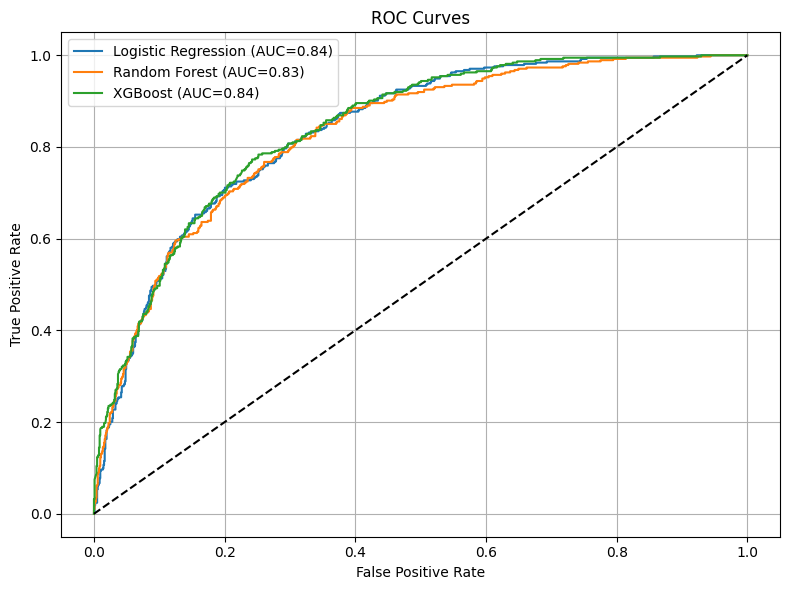

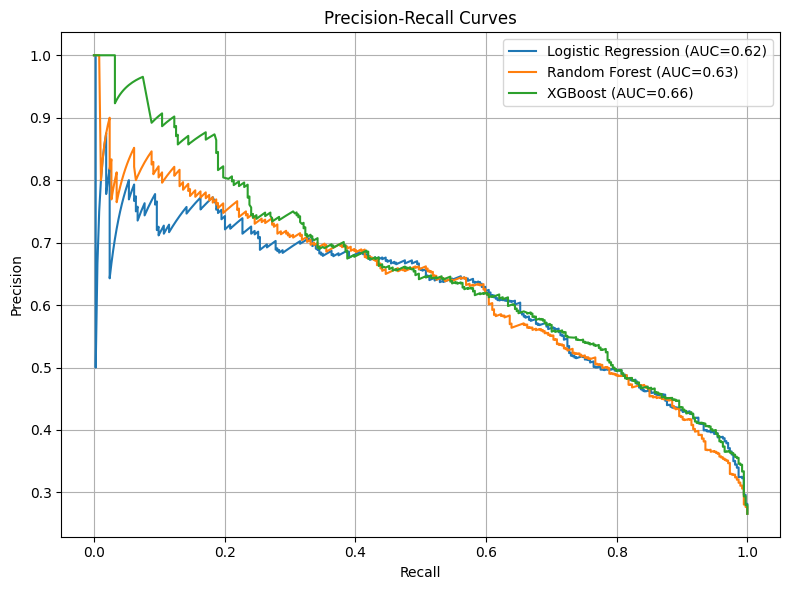

In [89]:
plot_roc_curves(roc_curves)
plot_pr_curves(pr_curves)

###  Model Comparison After Hyperparameter Tuning

Below is the comparison of Logistic Regression, Random Forest, and XGBoost after applying `GridSearchCV` with carefully selected hyperparameter ranges.

#### - Conclusion:
- **XGBoost** has the **best ROC-AUC** and **PR-AUC**, indicating strong performance on both balanced and imbalanced metrics.
- **Logistic Regression** performs slightly better in terms of **F1-Score and Recall**, and remains a good interpretable option.
- **Random Forest** offers the **highest precision**, which is valuable when false positives are costly.

 **Best Overall Choice**: **XGBoost** (with tuned parameters).


<h2>Feature Explainability</h2>

- understanding features importance across the data

In [90]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

In [91]:
X_train_df = X_train_df.astype(float)
X_test_df = X_test_df.astype(float)

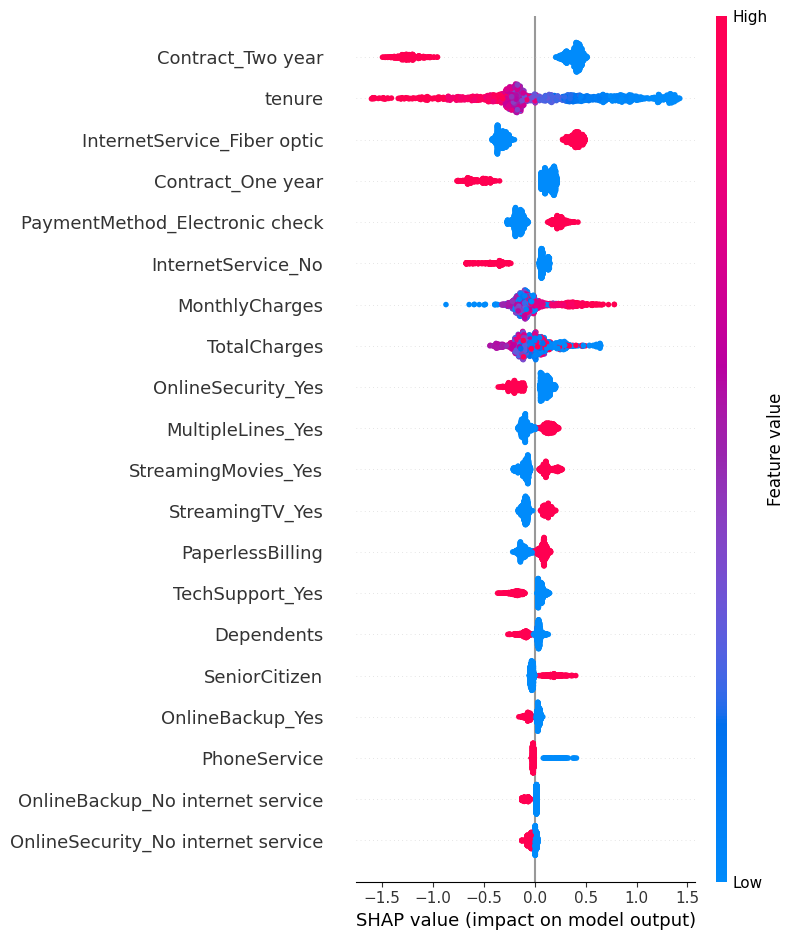

In [92]:
import shap

model = best_models['XGBoost']

explainer = shap.Explainer(model, X_train_df)
shap_values = explainer(X_test_df)

shap.summary_plot(shap_values, X_test_df)

### 📈 SHAP Summary Plot Interpretation

The SHAP summary plot shows how each feature contributes to the model's predictions:

- **Feature Importance**: Features are ranked from top (most important) to bottom.
- **Feature Impact**: The x-axis shows how much each feature value (SHAP value) pushes the model output.
- **Color Encoding**: Red = high feature value, Blue = low feature value.

**Key Insights:**
- Features like `tenure`, `MonthlyCharges`,`InternetServices_Fiber optics` or `Contract` may have a strong influence on churn.
- High `tenure` may reduce churn, while high `MonthlyCharges` may increase it.

This plot helps us understand not just **which** features matter, but **how** they influence the predictions.


##  Conclusion & Final Thoughts

In this project, we built a robust end-to-end pipeline to predict **customer churn** using the Telco Customer dataset. Here's a summary of what we learned:

### ✅ Key Findings:
- The dataset was slightly imbalanced, with more customers not churning.
- Features like **tenure**, **contract type**, and **monthly charges** had strong influence on churn.
- Customers with **short tenure** and **month-to-month contracts** were more likely to churn.
- We performed thorough basic EDA, preprocessing, and feature engineering to prepare the data for modeling.

### 🧠 Model Performance:
- We evaluated three models: **Logistic Regression**, **Random Forest**, and **XGBoost**.
- After hyperparameter tuning:
  - **XGBoost** achieved the highest **ROC-AUC (0.84)** and **PR-AUC (0.66)**, making it the best overall model.
  - **Logistic Regression** gave strong recall and F1-score, making it a great interpretable baseline.
  - **Random Forest** offered high precision but slightly lower recall.

### 🔍 Feature Explainability:
- Using **SHAP values**, we explained how individual features impact model predictions.
- Features like **tenure**, **Contract**, **InternetServices_Fiber optic** and **MonthlyCharges** were the top contributors to churn prediction.


🎯 **Final Takeaway:**  
With well-tuned models and explainability tools, we can confidently identify which customers are at high risk of churning — and take action to retain them.
